In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read the CSV file
data = pd.read_csv('customer_booking.csv', encoding='latin-1')

print(data)
data.shape

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour flight_d

(50000, 14)

In [3]:
# Separate the features (X) and the target variable (y)
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

In [4]:
# Get the categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [5]:
# Perform one-hot encoding on categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_columns])

In [6]:
# Get the unique feature names for the encoded columns
feature_names = []
for feature in encoder.categories_:
    feature_names.extend(feature)

In [7]:
# Create a DataFrame from the encoded columns
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

In [8]:
# Drop the original categorical columns from X
X = X.drop(categorical_columns, axis=1)

In [9]:
# Concatenate the encoded categorical columns with the remaining numerical columns
X_processed = pd.concat([X, X_encoded_df], axis=1)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [11]:
# Create a random forest classifier
clf = RandomForestClassifier()

In [12]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [14]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8543


In [16]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid = {'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [17]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.548621,0.112035,0.010721,0.006518,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.85048,0.85048,0.85040,0.85040,0.85044,0.000040,1
1,0.507156,0.133786,0.009474,0.004911,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.85048,0.85048,0.85040,0.84872,0.85002,0.000751,2
2,0.574248,0.164522,0.010721,0.004750,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.84696,0.82144,0.82984,0.80016,0.82460,0.016843,3


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer
import numpy as np

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid = {'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [20]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.761607,0.145236,0.019650,0.004624,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.617786,0.175277,0.017653,0.003813,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.874075,0.193313,0.019148,0.006193,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.375000,0.000000,0.000000,0.304348,...,0.009955,0.018128,0.000000,0.004160,0.020208,0.016790,0.021694,0.011887,0.014724,0.007844
3,0.912075,0.197343,0.023637,0.008079,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.161290,0.325000,0.288889,0.236287,...,0.063001,0.091233,0.054532,0.050817,0.085587,0.079643,0.088410,0.071471,0.077040,0.016527
4,0.881650,0.186410,0.024535,0.009966,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.163142,0.237288,0.226601,0.177436,...,0.189153,0.251857,0.223477,0.172660,0.235661,0.223477,0.233581,0.215156,0.221182,0.024179
5,1.008922,0.230364,0.028424,0.013654,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.158451,0.229457,0.295688,0.170423,...,0.316048,0.357949,0.349777,0.322883,0.355126,0.349331,0.353343,0.338336,0.345413,0.015530
6,0.907042,0.145782,0.020148,0.006383,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.157895,0.235052,0.266537,0.174094,...,0.454532,0.449926,0.438187,0.428678,0.465230,0.463150,0.464487,0.454978,0.457995,0.015775
7,0.904527,0.149949,0.019249,0.004528,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.158498,0.210526,0.237172,0.171818,...,0.592719,0.572511,0.583358,0.570728,0.575632,0.572660,0.576672,0.573700,0.580086,0.008402
8,0.903327,0.139174,0.028009,0.009290,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.159193,0.198522,0.219523,0.168973,...,0.680089,0.672957,0.671174,0.668648,0.659733,0.663150,0.661070,0.657801,0.669638,0.008789
9,0.851733,0.091967,0.017154,0.004342,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.162146,0.185014,0.201855,0.165546,...,0.758841,0.726449,0.754829,0.741753,0.728678,0.727786,0.731947,0.737741,0.738641,0.010877


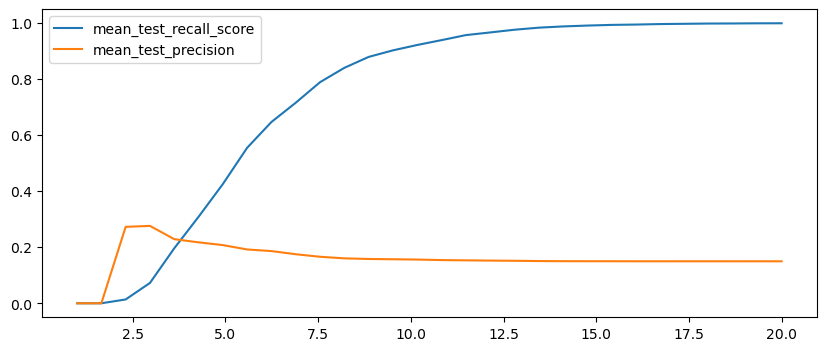

In [34]:
import matplotlib.pylab as plt

plt.figure(figsize=(10, 4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
            df[score],
            label=score)
    
plt.legend();